In [76]:
# import necessary packages
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib  inline
pal = sns.set_palette(sns.color_palette("OrRd_r", 8))

In [6]:
# read in all three csv files
df_full = pd.read_csv('Recipes_Full.csv', index_col = 'Unnamed: 0')
df_cat = pd.read_csv('Recipes_Categories.csv', index_col = 'Unnamed: 0')
df_ingr = pd.read_csv('Recipes_Ingredients.csv', index_col = 'Unnamed: 0')

In [7]:
df_full.head()

,Title,Rating,Rating Group,Calories,Protein,Fat,Sodium,22-Minute Meals,3-Ingredient Recipes,Advance Prep Required,...,Whiskey,White Wine,Whole Wheat,Wild Rice,Wine,Wok,Yellow Squash,Yogurt,Yuca,Zucchini
0,"Lentil, Apple, and Turkey Wrap",2.500,2-3,426.0,30.0,7.0,559.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,4-5,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,3-4,165.0,6.0,7.0,165.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,4-5,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,3-4,547.0,20.0,32.0,452.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Nutritional Data

We're provided with data on 'Calories', 'Protein', 'Fat', 'Sodium'. Let's see what the distribution of these variables are and if we can glean any insights from them. We will first study all the data together, and then by rating group to see if there's any variety.

In [88]:
nutritional_info = ['Calories', 'Protein', 'Fat', 'Sodium']

df_full.describe()[nutritional_info].round(2)

,Calories,Protein,Fat,Sodium
count,15935.00,15890.00,15869.00,15933.00
mean,6322.96,100.16,346.88,6225.97
std,359046.04,3840.32,20456.11,333318.19
min,0.00,0.00,0.00,0.00
25%,198.00,3.00,7.00,80.00
50%,331.00,8.00,17.00,294.00
75%,586.00,27.00,33.00,711.00
max,30111218.00,236489.00,1722763.00,27675110.00


In [89]:
nutritional_info[1]

'Protein'

We have absurdly large max values and standard deviations because of it. Let's look violin plots of our data.

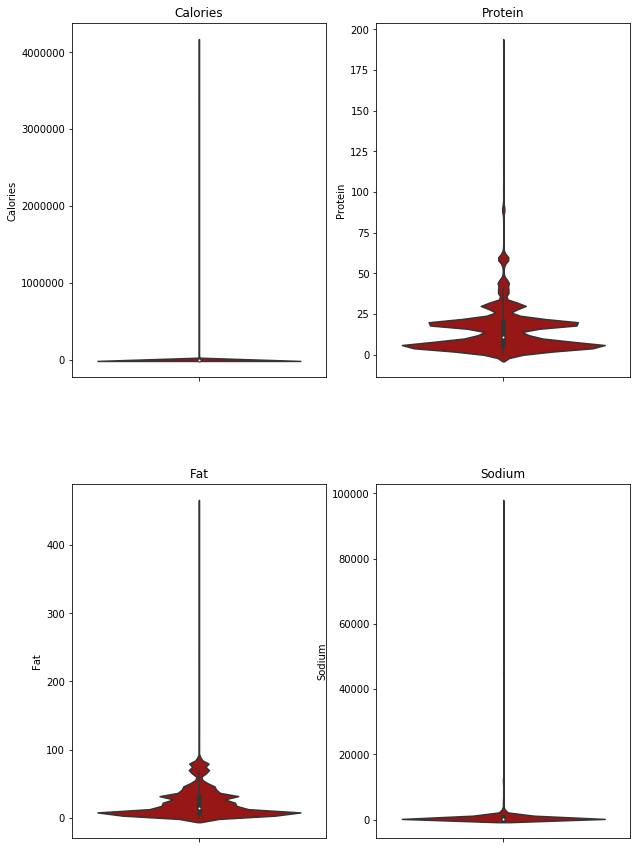

In [97]:
fig = plt.figure()
for k in range(4):    
    ax = fig.add_subplot(2,2,k+1)
    fig.set_figheight(15)
    fig.set_figwidth(10)
    fig.subplots_adjust(hspace=.3)
    
    col = nutritional_info[k]
    sns.violinplot(y = df_full[col], data = df_full[col], orient='v')
    ax.set_title(nutritional_info[k])